<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/kesten_process_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.7)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numba import jit, njit, prange
import quantecon as qe

## Exercise 1

In [3]:
alpha_0, alpha_1 = 0.00001, 0.1
beta, sigma_0 = 0.9, 0
years, days = 15, 250

In [4]:
sims = []
sigma = sigma_0**2
for _ in range(years):
  for _ in range(days):
    xi, zeta = np.random.randn(2)
    sigma = alpha_0 + sigma*(alpha_1*xi**2 + beta)
    returns = np.sqrt(sigma)*zeta 
    sims.append(returns)

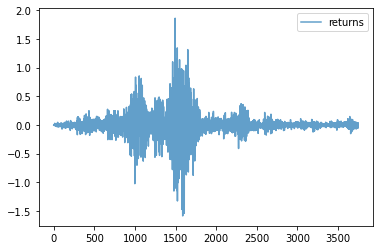

In [5]:
plt.plot(sims, label='returns', alpha=0.7)
plt.legend();

## Exercise 4

In [6]:
mu_a = -0.5        # location parameter for a
sigma_a = 0.1         # scale parameter for a
mu_b = 0.0         # location parameter for b
sigma_b = 0.5         # scale parameter for b
mu_e = 0.0         # location parameter for e
sigma_e = 0.5         # scale parameter for e
s_bar = 1.0       # threshold
T = 500           # sampling date
M = 1_000_000    # number of firms
s_init = 1.0      # initial condition for each firm

In [7]:
@njit(parallel=True)
def Simulation():
  T_path = np.zeros(M)
  for m in prange(M):
    s = s_init
    for _ in range(T):
      if s < s_bar:
        s = np.exp(mu_e+sigma_e*np.random.randn())
      else:
        s = np.exp(mu_a+sigma_a*np.random.randn())*s + \
           np.exp(mu_b+sigma_b*np.random.randn())
    T_path[m] = s
  return T_path

In [8]:
%%time

last_path = Simulation()

CPU times: user 1min 38s, sys: 22.2 ms, total: 1min 38s
Wall time: 50.1 s


In [9]:
last_path.sort()
largest_th_path = last_path[-1000:]

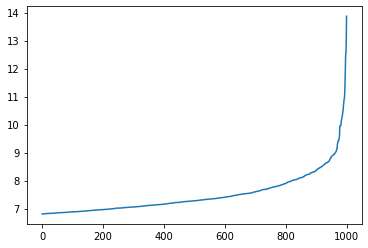

In [10]:
plt.plot(largest_th_path);

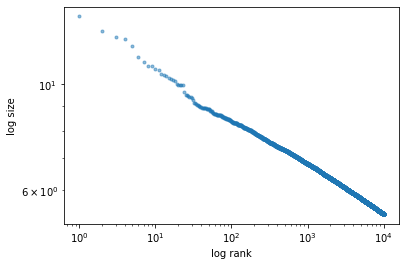

In [11]:
fig, ax = plt.subplots()
qe.rank_size_plot(last_path, ax, c=0.01)
plt.show()